In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.1'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
cohort = "experimental"             # cohort name

train_method = "sampling_beta"            # method name
test_method = "full_pert_nominal"      # method name

scene = "flightroom"                  # scene name

courses = [                         # course names
    "robustness_track",
    # "hover",
    # "infinity"
    ]   

roster = [
    "Maverick",                     # sifu_testbed
    "Iceman",                       # sifs_testbed
    "Rooster",                      # sift_testbed
    # "Daishi"                        # sift_testbed double sized
    # "hsDavion",                     # sifu_testbed
    # "hsSteiner",                    # sifs_testbed
    # "hsKurita",                     # sift_testbed
    ]

Neps_hN = 200                        # histNet number of epochs 
Neps_cN = 200                       # commNet number of epochs

In [ ]:
# # Generate Rollouts
# rg.generate_rollout_data(cohort,courses,scene,train_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)
# ps.plot_rollout_data(cohort,show_3D=False,show_time=False)

In [ ]:
# Train the History Network
tp.train_roster(cohort,roster,"histNet",Neps_hN,regen_data=True)
# tp.train_roster(cohort,roster,"histNet",Neps_hN,regen_data=False)

# Review Losses
pl.plot_losses(cohort,roster,"histNet")

In [ ]:
# Train the Command Network
# tp.train_roster(cohort,roster,"commNet",Neps_cN,regen_data=True)
tp.train_roster(cohort,roster,"commNet",20,regen_data=False)

# Review Losses
pl.plot_losses(cohort,roster,"commNet")

Plotting trajectories for expert...

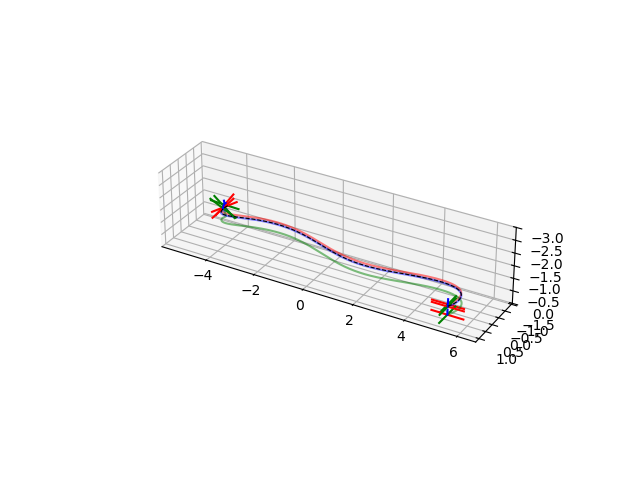

Plotting trajectories for Maverick...

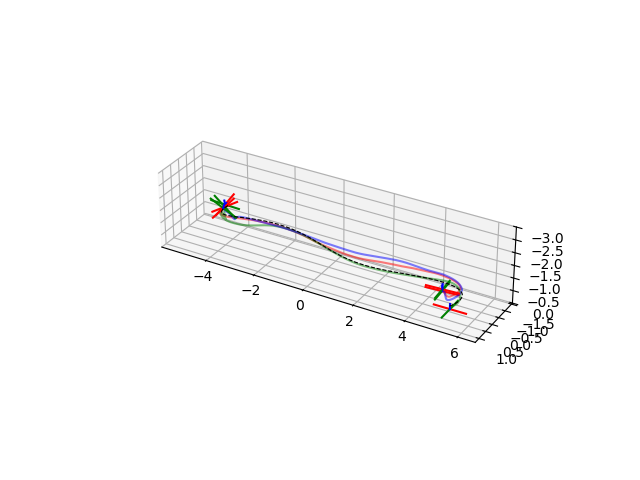

Plotting trajectories for Iceman...

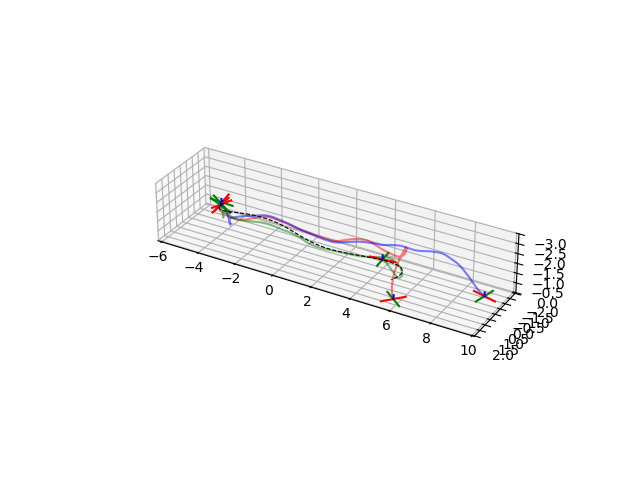

Plotting trajectories for Rooster...

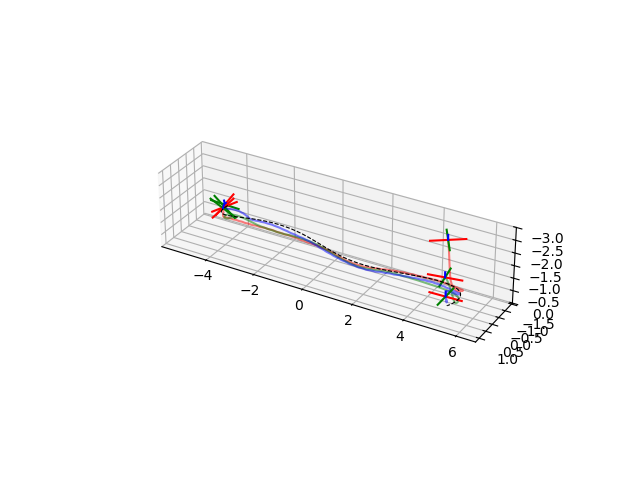

                      Deployment Summary                      
┏━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot    ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert   │   0.15   │   0.04   │ 0.67 │ 192.74  │  70.77   │
│ Maverick │   0.23   │   0.12   │ 0.70 │ 598.65  │  138.56  │
│ Iceman   │   0.58   │   0.26   │ 0.42 │ 590.18  │  137.26  │
│ Rooster  │   0.29   │   0.23   │ 0.74 │ 471.36  │  125.03  │
└──────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [4]:
# Simulate in FiGS
for course in courses:
    # df.deploy_roster(cohort,course,scene,test_method,roster)
    pl.plot_deployments(cohort,course,roster,plot_show=True)